In [1]:
import os
import sys
import numpy as np
import pandas as pd

In [2]:
filename="../dataset/expr_matrix_pearsonresidual_7.txt"
df = pd.read_csv(filename, delimiter='\t')
df = df.set_index('genes').T

In [3]:
from qscgrn import *

ncells, ngenes = df.shape
df = qsc_order_gene(df)
genes = df.columns.to_list()
p_obs = qsc_distribution(df)
activation = qsc_activation_ratios(df)

2022-07-04 15:01:22 | I | The dataframe genes are ordered
2022-07-04 15:01:22 | I | The observed probability `p_obs` is calculated
2022-07-04 15:01:22 | I | Activation ratios are computed


2022-07-04 15:01:22 | I | Plotting the Observed distribution in a barplot and exporting to 02_p_obs.svg file.


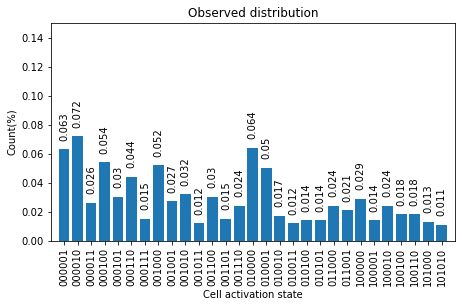

In [4]:
mask = mini_hist(ngenes, p_obs, limit=0.01, ymax=0.15,
                 title="Observed distribution",
                 filename="02_p_obs.svg")

In [5]:
theta = theta_init(genes, activation_ratios=activation)
edges = edges_init(genes)
qgrn = model(ncells, genes, theta, edges, p_obs, epochs=1000)
qgrn.train()

2022-07-04 15:01:23 | I | Theta series is initialized using zeros as method with activation values
2022-07-04 15:01:23 | I | Edges for the QuantumGRN and quantum circuit are created for 6 genes
2022-07-04 15:01:23 | I | The QuantumGRN model is been initialized with 6 genes and 28208 cells
2022-07-04 15:01:23 | I | Starting the optimization for the QuantumGRN
1000/1000 [==================================================] - 51s 51ms/step
2022-07-04 15:02:13 | I | Optimization completed!!.. Due to the number of epochs reached


In [6]:
p_out =qgrn.p_out.reshape(2**ngenes,)

In [7]:
p_qiskit = qgrn.run_qiskit(filename="02_qgrn_circuit.svg")

2022-07-04 15:02:16 | I | Drawing the quantum circuit of the qscGRN model and saving to 02_qgrn_circuit.svg


2022-07-04 15:02:16 | I | Plotting the Comparison of distributions in a barplot and exporting to 02_comparison_obs_out.svg file.


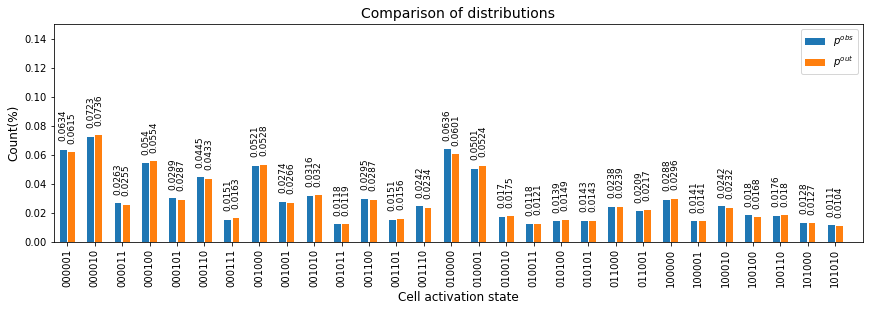

In [8]:
comparison_hist(ngenes, p_obs, p_out, limit=0.01, ymax=0.15, mask=mask,
                filename="02_comparison_obs_out.svg", tags=["p^{obs}", "p^{out}"])

2022-07-04 15:02:17 | I | Plotting the Comparison of distributions in a barplot and exporting to 02_comparison_obs_qiskit.svg file.


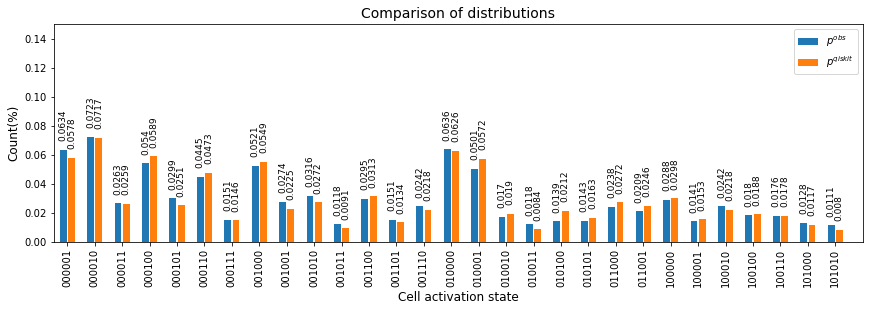

In [9]:
comparison_hist(ngenes, p_obs, p_qiskit, limit=0.01, ymax=0.15, mask=mask,
                filename="02_comparison_obs_qiskit.svg", tags=["p^{obs}", "p^{qiskit}"])

In [10]:
draw_network(genes, edges, qgrn.theta, filename="02_qgrn_network.svg")

2022-07-04 15:02:18 | I | Drawing the network representation of the qscGRN model and exporting to 02_qgrn_network.svg file.
